In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
model = LogisticRegression()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.2)
model.fit(X_train,y_train)

LogisticRegression()

In [7]:
model.score(X_test,y_test)

0.9666666666666667

In [8]:
target_index = 98
target_index_predicted = model.predict([iris.data[target_index]])
iris.target_names[target_index_predicted]

array(['versicolor'], dtype='<U10')

In [9]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  9]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

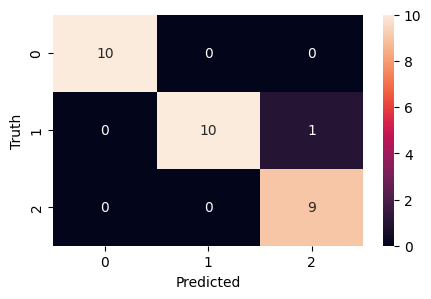

In [10]:
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)

y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [12]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
print(y)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [14]:
y = pd.get_dummies(y)
y

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [15]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.25)


from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn import tree
dt = DecisionTreeClassifier()


dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
parameter={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier() 
cv=GridSearchCV(model,parameter,scoring='accuracy')
cv.fit(x_train,y_train)

C:\Users\Adarsh surendran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Adarsh surendran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Adarsh surendran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Adarsh surendran\AppData\Local\Programs\Pytho

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [17]:
best_model=cv.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

[Text(0.3333333333333333, 0.9166666666666666, 'x[2] <= 2.45\nentropy = 1.578\nsamples = 112\nvalue = [37, 33, 42]'),
 Text(0.2222222222222222, 0.75, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.4444444444444444, 0.75, 'x[2] <= 4.75\nentropy = 0.99\nsamples = 75\nvalue = [0, 33, 42]'),
 Text(0.2222222222222222, 0.5833333333333334, 'x[0] <= 4.95\nentropy = 0.206\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[3] <= 1.85\nentropy = 0.359\nsamples = 44\nvalue = [0, 3, 41]'),
 Text(0.5555555555555556, 0.4166666666666667, 'x[3] <= 1.75\nentropy = 0.696\nsamples = 16\nvalue = [0, 3, 13]'),
 Text(0.3333333333333333, 0.25, 'x[2] <= 5.3\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.2222222222222222, 0.08333333333333333, 'entropy = 0.918\ns

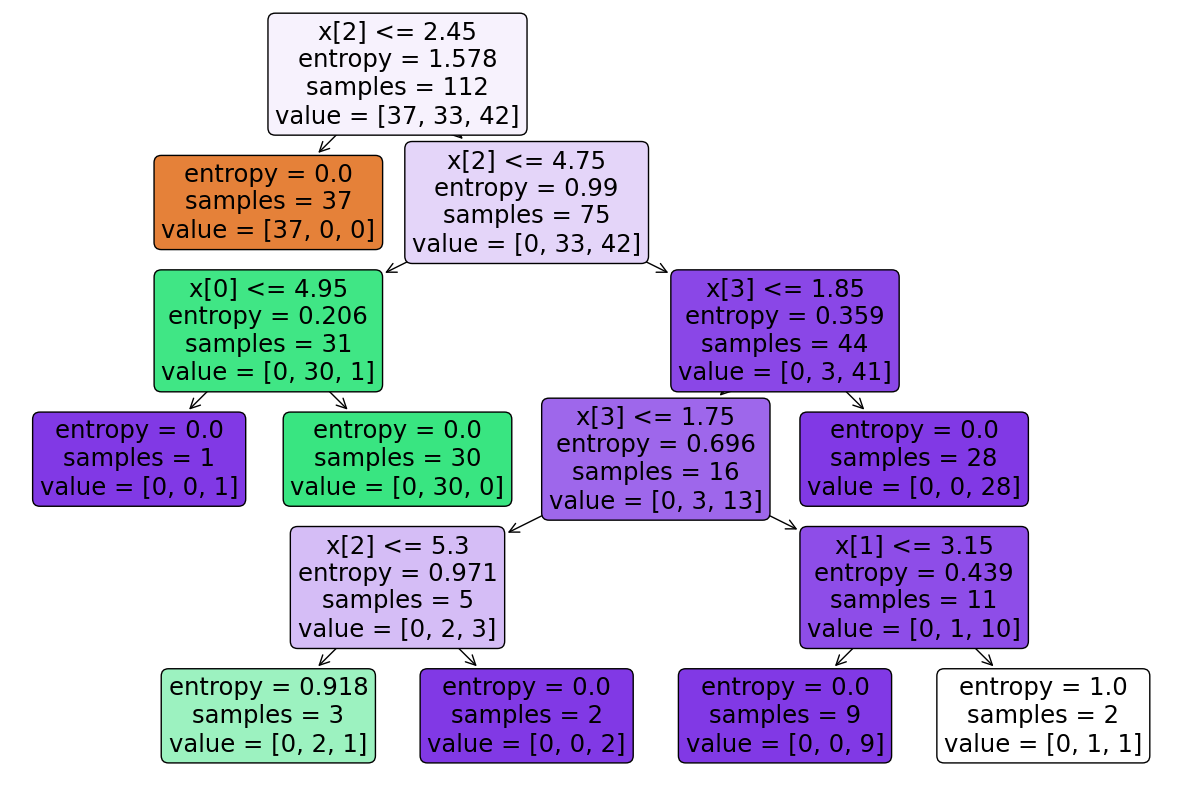

In [18]:
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=None, class_names=None, filled=True, rounded=True)

In [19]:
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

[0.         0.01190476 0.01267136 0.01728111 0.26280006 0.33342474]


In [20]:
y_pred=cv.predict(iris.data)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,iris.target)
score

0.9733333333333334

In [24]:
y_pred=clf.predict(iris.data)

In [25]:
score1=accuracy_score(y_pred,iris.target)

In [26]:
score1

0.3333333333333333

In [27]:
model1 = DecisionTreeClassifier()

In [28]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred1=model1.predict(iris.data)

In [30]:
score2=accuracy_score(y_pred1,iris.target)


In [31]:
score2

0.9866666666666667